# Build and Evaluate a Regression model

In [2]:
# Import python libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the python machine learning libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Sklearn regression algorithm
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_absolute_error

from function import *

## Define the task

"Make predictions about a country's life expectancy in years from a set of metrics for the country."

## Acquire clean data

### Load the data

In [3]:
df = pd.read_csv('C:/Users/MyPC/MyPython/Project/Files/Supervised-Learning-master/world_data.csv')

### Inspect the data

In [4]:
df.shape

(194, 17)

In [5]:
df.head()

,country,happiness,income,lifeexp,sanitation,water,urbanpopulation,unemployment,literacy,inequality,murder,energy,childmortality,fertility,hiv,foodsupply,population
0,Afghanistan,3.982855,1750.0,57.9,39.2,63.0,11.0,NaN,39.0,NaN,NaN,NaN,73.2,4.80,5800.0,2090.0,33700000
1,Albania,4.606651,11000.0,77.6,97.7,91.4,NaN,6.090,96.8,29.0,2.30,808.0,14.0,1.71,NaN,3190.0,2920000
2,Argentina,6.697131,19100.0,76.5,94.8,99.6,43.1,0.856,97.9,41.4,4.65,2020.0,11.6,2.31,95000.0,3230.0,43400000
3,Armenia,4.348320,8180.0,75.4,91.6,98.9,36.7,7.110,99.6,32.4,1.12,1020.0,14.0,1.66,3600.0,2930.0,2920000
4,Australia,7.309061,43800.0,82.6,100.0,100.0,60.2,1.240,NaN,34.7,1.11,5480.0,3.8,1.86,22000.0,3280.0,23800000


In [6]:
df.dtypes

country             object
happiness          float64
income             float64
lifeexp            float64
sanitation         float64
water              float64
urbanpopulation    float64
unemployment       float64
literacy           float64
inequality         float64
murder             float64
energy             float64
childmortality     float64
fertility          float64
hiv                float64
foodsupply         float64
population           int64
dtype: object

In [7]:
df.isnull().mean().sort_values()

country            0.000000
water              0.000000
sanitation         0.000000
population         0.000000
income             0.005155
childmortality     0.005155
lifeexp            0.036082
fertility          0.051546
energy             0.128866
foodsupply         0.134021
inequality         0.175258
hiv                0.231959
literacy           0.231959
happiness          0.278351
urbanpopulation    0.386598
unemployment       0.422680
murder             0.520619
dtype: float64

### Clean data

In [8]:
df = df.drop(['murder', 'urbanpopulation', 'unemployment'], axis=1)

In [9]:
means = df.mean().to_dict()

for m in means:
    df[m] = df[m].fillna(value=means[m])

In [10]:
df.isnull().mean()

country           0.0
happiness         0.0
income            0.0
lifeexp           0.0
sanitation        0.0
water             0.0
literacy          0.0
inequality        0.0
energy            0.0
childmortality    0.0
fertility         0.0
hiv               0.0
foodsupply        0.0
population        0.0
dtype: float64

## Understand the data

### Compute descriptive stats

In [11]:
df.describe()

,happiness,income,lifeexp,sanitation,water,literacy,inequality,energy,childmortality,fertility,hiv,foodsupply,population
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,1.940000e+02,194.000000,1.940000e+02
mean,5.395765,17432.849741,71.933690,73.838247,86.329381,81.573826,38.579375,2183.725325,31.441451,2.835924,2.179917e+05,2845.952381,3.787195e+07
std,0.953547,19072.580021,7.466359,29.269367,17.568245,17.055722,7.257464,2618.536430,31.237992,1.336162,5.521169e+05,413.199619,1.419670e+08
min,2.701591,623.000000,49.600000,7.080000,19.300000,25.300000,16.600000,9.580000,2.200000,1.240000,6.000000e+01,1880.000000,1.100000e+04
25%,4.891838,3297.500000,66.425000,49.225000,77.900000,75.575000,34.000000,614.500000,8.200000,1.790000,1.025000e+04,2570.000000,1.982500e+06
50%,5.395765,11050.000000,72.550000,87.900000,94.950000,81.573826,38.579375,1565.000000,17.900000,2.415000,7.000000e+04,2845.952381,8.435000e+06
75%,5.880369,24100.000000,77.400000,97.700000,99.300000,95.375000,42.175000,2425.000000,49.225000,3.687500,2.179917e+05,3140.000000,2.742500e+07
max,7.603434,120000.000000,83.800000,100.000000,100.000000,100.000000,63.000000,18600.000000,137.000000,7.290000,5.600000e+06,3770.000000,1.400000e+09


### Visualize

In [13]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [14]:
plt.style.use('bmh')

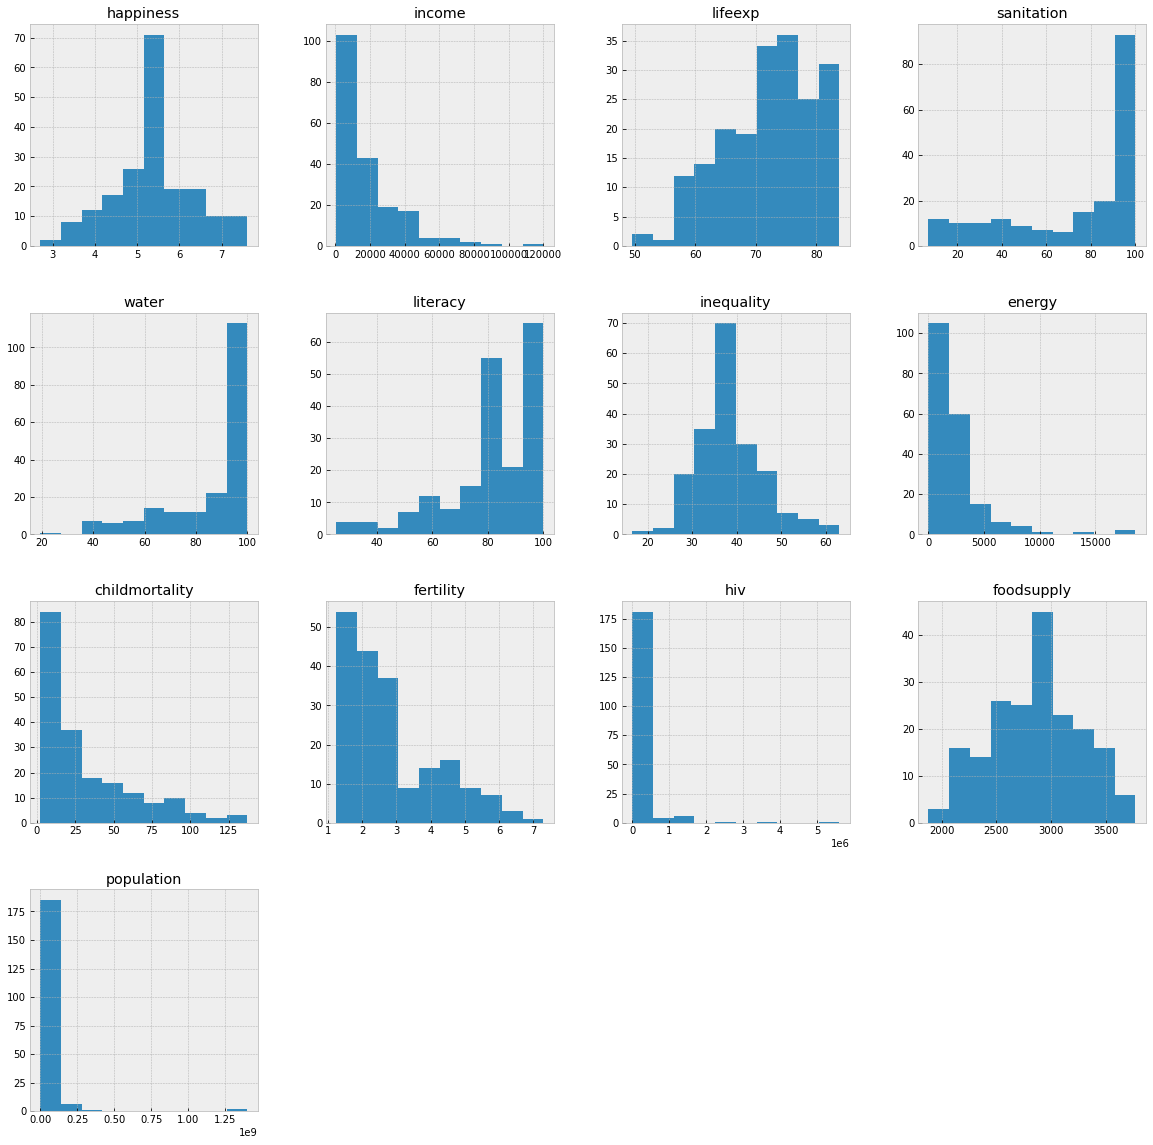

In [15]:
df.hist(figsize=(20,20))
plt.show()

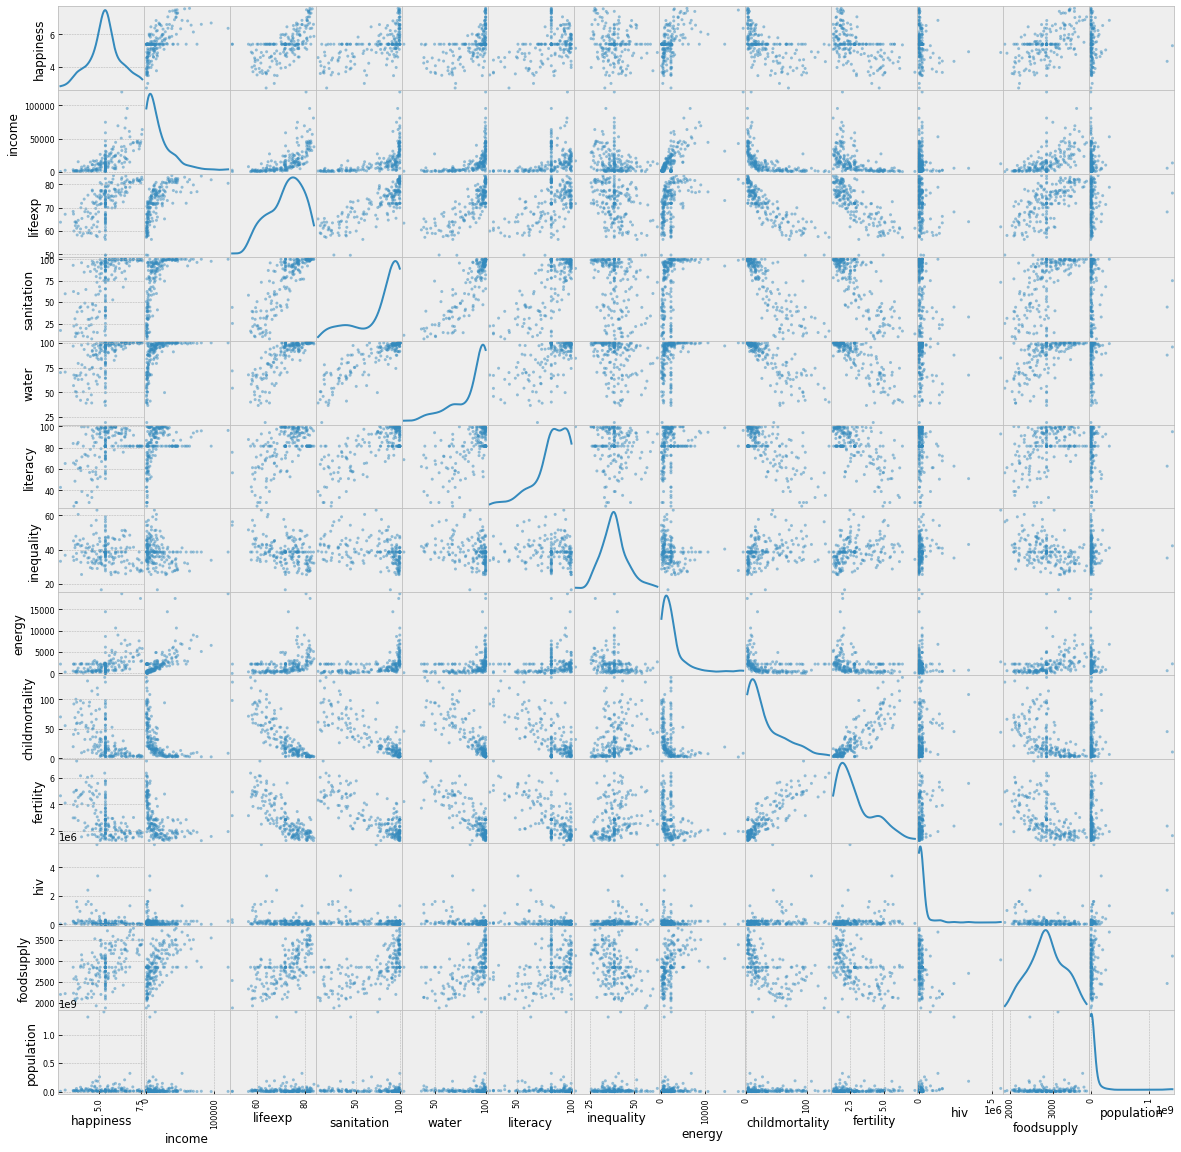

In [16]:
scatterMatrix(df)

## Prepare data

In [17]:
df.columns

Index(['country', 'happiness', 'income', 'lifeexp', 'sanitation', 'water',
       'literacy', 'inequality', 'energy', 'childmortality', 'fertility',
       'hiv', 'foodsupply', 'population'],
      dtype='object')

In [18]:
y = df['lifeexp']
X = df[['happiness', 'income', 'sanitation', 'water',
       'literacy', 'inequality', 'energy', 'childmortality', 'fertility',
       'hiv', 'foodsupply', 'population']]

### Scale features

In [19]:
X.describe()

,happiness,income,sanitation,water,literacy,inequality,energy,childmortality,fertility,hiv,foodsupply,population
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,1.940000e+02,194.000000,1.940000e+02
mean,5.395765,17432.849741,73.838247,86.329381,81.573826,38.579375,2183.725325,31.441451,2.835924,2.179917e+05,2845.952381,3.787195e+07
std,0.953547,19072.580021,29.269367,17.568245,17.055722,7.257464,2618.536430,31.237992,1.336162,5.521169e+05,413.199619,1.419670e+08
min,2.701591,623.000000,7.080000,19.300000,25.300000,16.600000,9.580000,2.200000,1.240000,6.000000e+01,1880.000000,1.100000e+04
25%,4.891838,3297.500000,49.225000,77.900000,75.575000,34.000000,614.500000,8.200000,1.790000,1.025000e+04,2570.000000,1.982500e+06
50%,5.395765,11050.000000,87.900000,94.950000,81.573826,38.579375,1565.000000,17.900000,2.415000,7.000000e+04,2845.952381,8.435000e+06
75%,5.880369,24100.000000,97.700000,99.300000,95.375000,42.175000,2425.000000,49.225000,3.687500,2.179917e+05,3140.000000,2.742500e+07
max,7.603434,120000.000000,100.000000,100.000000,100.000000,63.000000,18600.000000,137.000000,7.290000,5.600000e+06,3770.000000,1.400000e+09


In [20]:
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(X)

X = pd.DataFrame(rescaledX, columns=X.columns)

In [21]:
X.describe()

,happiness,income,sanitation,water,literacy,inequality,energy,childmortality,fertility,hiv,foodsupply,population
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,0.549625,0.140813,0.718449,0.830600,0.753331,0.473693,0.116950,0.216925,0.263789,0.038917,0.511086,0.027044
std,0.194528,0.159768,0.314995,0.217698,0.228323,0.156411,0.140854,0.231736,0.220853,0.098593,0.218624,0.101406
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.446821,0.022404,0.453562,0.726146,0.673025,0.375000,0.032539,0.044510,0.090909,0.001820,0.365079,0.001408
50%,0.549625,0.087345,0.869780,0.937423,0.753331,0.473693,0.083668,0.116469,0.194215,0.012489,0.511086,0.006017
75%,0.648486,0.196663,0.975248,0.991326,0.938086,0.551185,0.129928,0.348850,0.404545,0.038917,0.666667,0.019582
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Build Models

### Split into test and training sets

In [22]:
test_size = 0.33
seed = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

### Create multiple models and fit them

In [24]:
models = [LinearRegression(), KNeighborsRegressor(), SVR()]

for model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_train)
    print(type(model).__name__, mean_absolute_error(y_train, predictions))

LinearRegression 2.2920035925091766
KNeighborsRegressor 2.1955055341375442
SVR 2.5427645613630157


## Evaluate the models

In [26]:
for model in models:
    predictions = model.predict(X_test)
    print(type(model).__name__, mean_absolute_error(y_test, predictions))

LinearRegression 2.4463956508110307
KNeighborsRegressor 2.5532340600575907
SVR 2.6412058180288183


In [28]:
model = models[0]

LogisticRegression 0.7230769230769231


In [28]:
predictions = model.predict(X_test)
df = X_test.copy()
df['Predicion'] = predictions
df['Actual'] = y_test
df['Error'] = y_test - predictions

In [29]:
df

,happiness,income,sanitation,water,literacy,inequality,energy,childmortality,fertility,hiv,foodsupply,population,Predicion,Actual,Error
44,0.262009,0.027702,0.077701,0.724907,0.618474,0.556034,0.017505,0.436202,0.462810,0.041061,0.603175,1.970658e-02,64.122909,65.40000,1.277091
172,0.549625,0.097816,0.629789,1.000000,0.753331,0.473693,0.116950,0.247774,0.263789,0.038917,0.511086,2.142874e-07,72.167513,71.93369,-0.233824
163,0.549625,0.010446,0.352131,0.558860,0.753331,0.439655,0.005617,0.398368,0.404959,0.038917,0.613757,7.214342e-05,66.064522,61.60000,-4.464522
35,0.420443,0.079387,0.926819,0.980173,0.638554,0.327586,0.043324,0.159496,0.342149,0.001686,0.867725,6.699267e-02,74.594477,71.90000,-2.694477
136,0.484455,0.042278,0.765390,0.890954,0.911647,0.392241,0.034718,0.146884,0.119008,0.044633,0.460317,6.684981e-02,72.858212,74.30000,1.441788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,0.549625,0.038257,0.930047,0.998761,0.986613,0.450431,0.029984,0.108309,0.403306,0.038917,0.511086,6.785768e-05,73.333089,70.30000,-3.033089
18,0.350346,0.007765,0.165949,0.428748,0.045515,0.403017,0.116950,0.640208,0.694215,0.021418,0.444444,1.292082e-02,63.085429,60.30000,-2.785429
159,0.549625,0.101167,0.766466,0.945477,0.753331,0.473693,0.041549,0.100890,0.147107,0.038917,0.301587,6.857197e-05,73.285264,71.40000,-1.885264
113,0.445901,0.098654,0.710504,0.810409,0.906292,1.000000,0.144721,0.310831,0.206612,1.000000,0.603175,3.949245e-02,69.807833,61.80000,-8.007833


## Interpret model

### Interpret linear regression model

In [30]:
models[0].coef_

array([  5.00912637,   9.2096769 ,   5.41605897,   2.26122297,
        -4.13876626,  -3.31059309,  -5.53211396, -14.32217202,
        -1.63521978,  -2.01476135,   2.22581396,   3.20586791])

In [31]:
models[0].intercept_

69.60409836404612

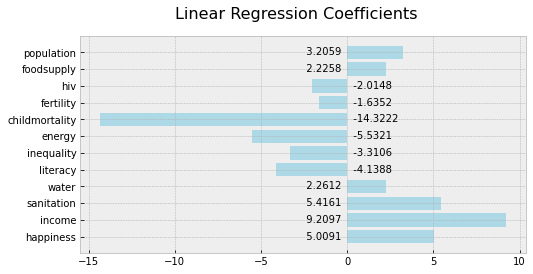

In [32]:
linearRegressionSummary(models[0],X.columns)

### Interpret knn model

In [33]:
models[1].kneighbors(X)

(array([[0.        , 0.38911668, 0.3929857 , 0.4201251 , 0.51618381],
        [0.        , 0.20505552, 0.20891422, 0.23226123, 0.26827204],
        [0.        , 0.12274953, 0.1953064 , 0.22064946, 0.22207317],
        [0.        , 0.16349608, 0.20891422, 0.22826679, 0.28847733],
        [0.13327753, 0.15176936, 0.16216559, 0.16956607, 0.18772587],
        [0.10256832, 0.15520456, 0.24629633, 0.24943538, 0.25508778],
        [0.        , 0.3593436 , 0.38793799, 0.38953126, 0.39317685],
        [0.        , 0.31469369, 0.32420127, 0.35698837, 0.41441586],
        [0.        , 0.1962574 , 0.34952635, 0.44393928, 0.51551159],
        [0.        , 0.12677335, 0.18037416, 0.18620954, 0.22384403],
        [0.        , 0.1768139 , 0.24628597, 0.25110484, 0.26795007],
        [0.50647823, 0.51036495, 0.51934624, 0.53394104, 0.5422487 ],
        [0.        , 0.28806232, 0.34952635, 0.46122169, 0.46576997],
        [0.        , 0.31134313, 0.31241819, 0.3828958 , 0.39244964],
        [0.15281102,

In [34]:
g = models[1].kneighbors_graph(X).toarray()

In [35]:
g[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])